In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import warnings

Reading Part A Data

In [ ]:
#Reading the Data
data=pd.read_excel("Part_1.xlsx")

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   int64         
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   int64         
 6   Days                            2389 non-null   int64         
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,...,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2389.000000,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,2389.000000,2389.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,1195.000000,7.268347,7.912908,0.154039,4.575136,1615.217664,16.867727,3.305567,0.570743,4.807451,...,34.250733,1615.217664,1.102135,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,689.789219,1.388350,1.558226,0.361062,1.432128,645.096047,16.942782,3.677022,0.230666,4.661194,...,31.590096,645.096047,0.611544,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,1.000000,3.000000,3.000000,0.000000,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,79.000000,0.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,598.000000,7.000000,8.000000,0.000000,4.000000,1174.000000,6.000000,1.000000,0.455000,2.000000,...,14.000000,1174.000000,1.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,1195.000000,8.000000,8.000000,0.000000,5.000000,1700.000000,12.000000,2.000000,0.600000,4.000000,...,26.000000,1700.000000,1.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,1792.000000,8.000000,8.000000,0.000000,5.000000,2048.000000,23.000000,4.000000,0.727000,6.000000,...,44.000000,2048.000000,1.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,2389.000000,12.000000,12.000000,1.000000,12.000000,4200.000000,257.000000,45.000000,1.000000,39.000000,...,313.000000,4200.000000,2.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


In [ ]:
#Creating a Dataframe
df = pd.DataFrame(data)

In [ ]:
#Check for data type
df.dtypes

ID                                         int64
Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                             int64
Days                                       int64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                    int64
FRP.Active                                 int64
FRP.Cancelled                              int64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                              int64
Total.Discount.Pax                         int64
Initial.System.Date 

In [ ]:
df1=df.copy()

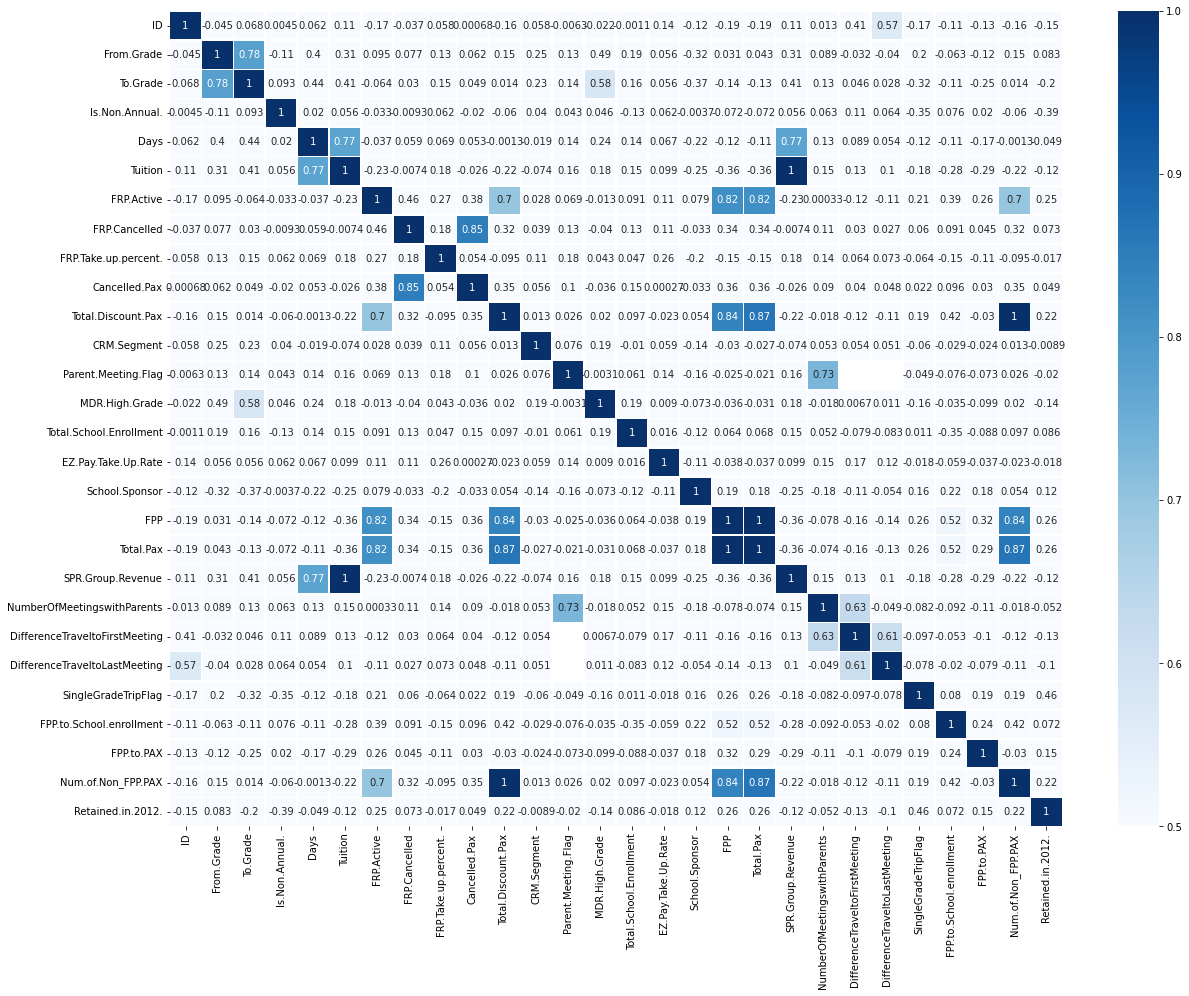

In [ ]:
#Plotting correlation matrix to find the data columns that are correlated to each other
import seaborn as sns
correlation_matrix = (df1).corr()

plt.figure(figsize = (20,15)) #For Size increase
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap="Blues",vmin= 0.5)
plt.show()

In [ ]:
#Droping some correlated columns with the aid of plot and logic
df1.drop(['FRP.Active','FRP.Cancelled','SPR.Group.Revenue','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','GroupGradeTypeLow','GroupGradeTypeHigh','Num.of.Non_FPP.PAX','SchoolGradeTypeLow','SchoolGradeTypeHigh'],axis=1, inplace=True)
df1.drop(['NumberOfMeetingswithParents','FirstMeeting','LastMeeting','Early.RPL','Latest.RPL','MDR.Low.Grade','MDR.High.Grade'],axis=1, inplace=True)
df1.reindex()
print(df1.shape)

(2389, 39)


In [ ]:
#Checking for null values
df1.isnull().sum()

ID                             0
Program.Code                   0
From.Grade                   127
To.Grade                     150
Group.State                    0
Is.Non.Annual.                 0
Days                           0
Travel.Type                    0
Departure.Date                 0
Return.Date                    0
Deposit.Date                   0
Special.Pay                 1919
Tuition                        0
FRP.Take.up.percent.           0
Cancelled.Pax                  0
Total.Discount.Pax             0
Initial.System.Date            8
Poverty.Code                 599
Region                         0
CRM.Segment                    4
School.Type                    0
Parent.Meeting.Flag            0
Total.School.Enrollment       91
Income.Level                  62
EZ.Pay.Take.Up.Rate            0
School.Sponsor                 0
SPR.Product.Type               0
SPR.New.Existing               0
FPP                            0
Total.Pax                      0
SchoolGrad

In [ ]:
#Replacing '0' with 'A' in poverty code column as it is being considered as null value and filling rest null values with 'U' as given in data file
df1["Poverty.Code"]=df1["Poverty.Code"].replace("0","A")
df1["Poverty.Code"]=df1["Poverty.Code"].fillna("U")
# Replacing null values with 'Z' given in data
df1["Income.Level"]=df1["Income.Level"].fillna("Z")

In [ ]:
#Replacing the 'NA' values with 'NU', since 'NA' are being comsidered as null values
df1["Special.Pay"]=df1["Special.Pay"].fillna("NU")

In [ ]:
#Dropping the rows with common values from all columns
df1 = df1.dropna(subset=['SchoolSizeIndicator','Total.School.Enrollment'], how='all')

In [ ]:
# Filling the 'From.Grade' and 'To.Grade' columns with mode values

#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(df1,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=df1[ColName].mode()[0]
    
    # replace nan values with most occured category
     df1[ColName + "_Imputed"] = df1[ColName]
     df1[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
#2. Call function to impute most occured category
for Columns in ['From.Grade','To.Grade']:
    impute_nan_most_frequent_category(df1,Columns)

<ipython-input-13-c6bbbc7955ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[ColName + "_Imputed"] = df1[ColName]
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Check for null values after filling the missing values data 
df1.isnull().sum()

ID                            0
Program.Code                  0
From.Grade                  114
To.Grade                    136
Group.State                   0
Is.Non.Annual.                0
Days                          0
Travel.Type                   0
Departure.Date                0
Return.Date                   0
Deposit.Date                  0
Special.Pay                   0
Tuition                       0
FRP.Take.up.percent.          0
Cancelled.Pax                 0
Total.Discount.Pax            0
Initial.System.Date           8
Poverty.Code                  0
Region                        0
CRM.Segment                   0
School.Type                   0
Parent.Meeting.Flag           0
Total.School.Enrollment       0
Income.Level                  0
EZ.Pay.Take.Up.Rate           0
School.Sponsor                0
SPR.Product.Type              0
SPR.New.Existing              0
FPP                           0
Total.Pax                     0
SchoolGradeType               0
Departur

Group.State
CA    452
TX    171
IL     73
WA     61
MI     55
CO     46
FL     42
OH     34
AZ     34
WI     34
MN     31
MO     29
OR     25
TN     25
MA     24
NE     23
IN     20
LA     17
IA     16
OK     16
KS     14
AL     13
NV     12
NM     12
VA     12
GA     12
CT     11
NY      9
KY      8
NH      7
HI      6
MS      6
SD      6
NC      5
ME      5
MD      4
AR      4
UT      4
ND      3
RI      3
SC      3
ID      2
PA      2
AK      2
MT      1
VT      1
NJ      1
WY      1
WV      0
Name: Retained.in.2012., dtype: int64


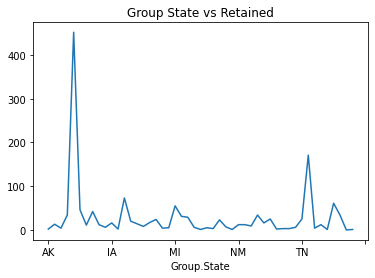

In [ ]:
## Visualize by Group State vs Retained
School_type = df1.groupby("Group.State")["Retained.in.2012."].sum()
print(School_type.sort_values(ascending=False))
School_type.plot(kind="line", title = "Group State vs Retained", x ="Group State", y = "Retained")

Poverty.Code
B    564
U    348
C    264
A    194
D     16
E      9
0      2
Name: Retained.in.2012., dtype: int64


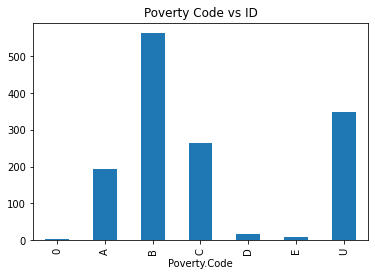

In [ ]:
## Visualize by Poverty Code vs Retained
Poverty_code = df1.groupby("Poverty.Code")["Retained.in.2012."].sum()
print(Poverty_code.sort_values(ascending=False))
Poverty_code.plot(kind="bar", title = "Poverty Code vs ID", x ="Poverty Code", y = "Retained")

Travel.Type
A    1150
B     243
N       0
T       4
Name: Retained.in.2012., dtype: int64


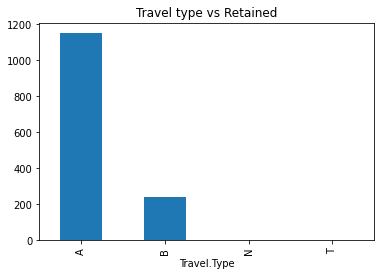

In [ ]:
## Visualize by travel type vs Retained
Travel_type = df1.groupby("Travel.Type")["Retained.in.2012."].sum()
print(Travel_type)
Travel_type.plot(kind="bar", title = "Travel type vs Retained", x ="Travel Type", y = "Retained")

Tuition
79      1
100     1
119     0
143     1
149     1
       ..
3628    0
3799    0
3884    1
4199    0
4200    1
Name: Retained.in.2012., Length: 1202, dtype: int64


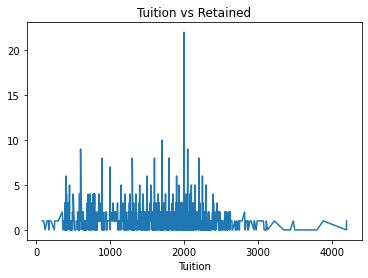

In [ ]:
## Visualize by Tuition vs Retained
Tuition = df1.groupby("Tuition")["Retained.in.2012."].sum()
print(Tuition)
Tuition.plot(kind="line", title = "Tuition vs Retained", x ="Tuition", y = "Retained")

Return.Date
2011-01-14    1
2011-01-17    1
2011-01-20    1
2011-01-21    1
2011-01-23    0
             ..
2011-06-30    3
2011-07-01    3
2011-07-02    2
2011-07-03    2
2011-07-05    1
Name: Retained.in.2012., Length: 140, dtype: int64


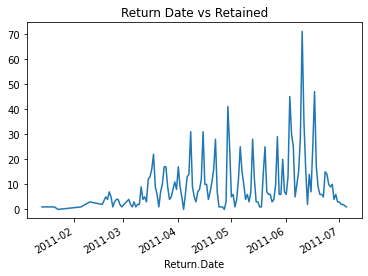

In [ ]:
## Visualize by Return type vs Retained
Return_Date = df1.groupby("Return.Date")["Retained.in.2012."].sum()
print(Return_Date)
Return_Date.plot(kind="line", title = "Return Date vs Retained", x ="Return Date", y = "Retained")

Region
Dallas                  157
Houston                 142
Northern California     265
Other                  1118
Pacific Northwest       192
Southern California     424
Name: Retained.in.2012., dtype: int64


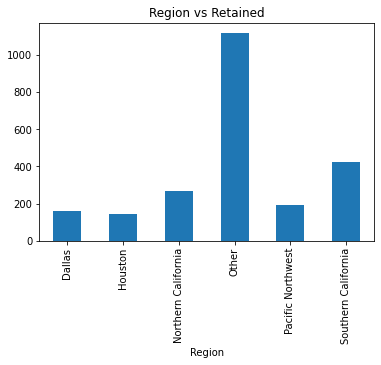

In [ ]:
## Visualize by Region vs Retained
Region_by_retained = df1.groupby("Region")["Retained.in.2012."].count()
print(Region_by_retained)
Region_by_retained.plot(kind="bar", title = "Region vs Retained", x ="Region", y = "Reained")

CRM.Segment
1.0      29
2.0      21
3.0       5
4.0     129
5.0     558
6.0      46
7.0      20
8.0      17
9.0       2
10.0    562
11.0      8
Name: Retained.in.2012., dtype: int64


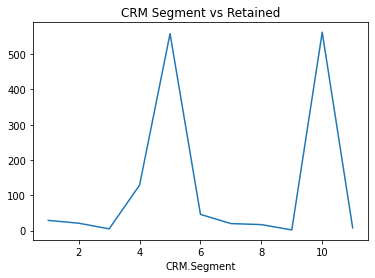

In [ ]:
## Visualize by CRM Segment vs Retained
CRM_Segment = df1.groupby("CRM.Segment")["Retained.in.2012."].sum()
print(CRM_Segment)
CRM_Segment.plot(kind="line", title = "CRM Segment vs Retained", x ="CRM Segment", y = "Retained")

School.Sponsor
0    2057
1     241
Name: Retained.in.2012., dtype: int64


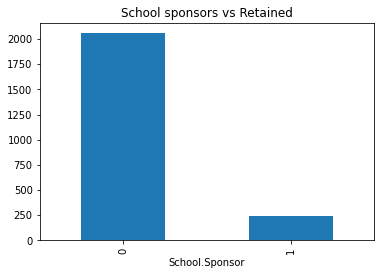

In [ ]:
## Visualize by School sponsors vs Retained
School_sponsors = df1.groupby("School.Sponsor")["Retained.in.2012."].count()
print(School_sponsors)
School_sponsors.plot(kind="bar", title = "School sponsors vs Retained", x ="School sponsors", y = "Retained")

SchoolSizeIndicator
L      402
M-L    392
S      229
S-M    374
Name: Retained.in.2012., dtype: int64


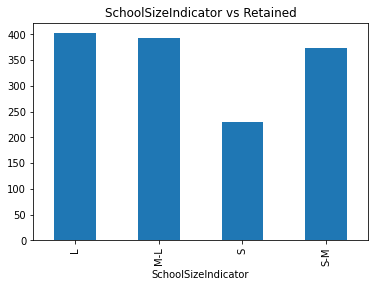

In [ ]:
## Visualize by School Size Indicator vs Retained
School_SizeIndicator = df1.groupby("SchoolSizeIndicator")["Retained.in.2012."].sum()
print(School_SizeIndicator)
School_SizeIndicator.plot(kind="bar", title = "SchoolSizeIndicator vs Retained", x ="SchoolSizeIndicator", y = "Retained")

In [ ]:
# Dropping some correlated columns
df1.drop(['To.Grade_Imputed','Days','Total.Pax','FPP','Income.Level','From.Grade','To.Grade','Initial.System.Date','EZ.Pay.Take.Up.Rate','FPP.to.School.enrollment','Departure.Date','Return.Date','Deposit.Date','Program.Code','Group.State'],axis=1, inplace=True)

In [ ]:
#Renaming the Retained column for easier access
df1.rename({"Retained.in.2012.":"Retained"}, axis=1, inplace=True)

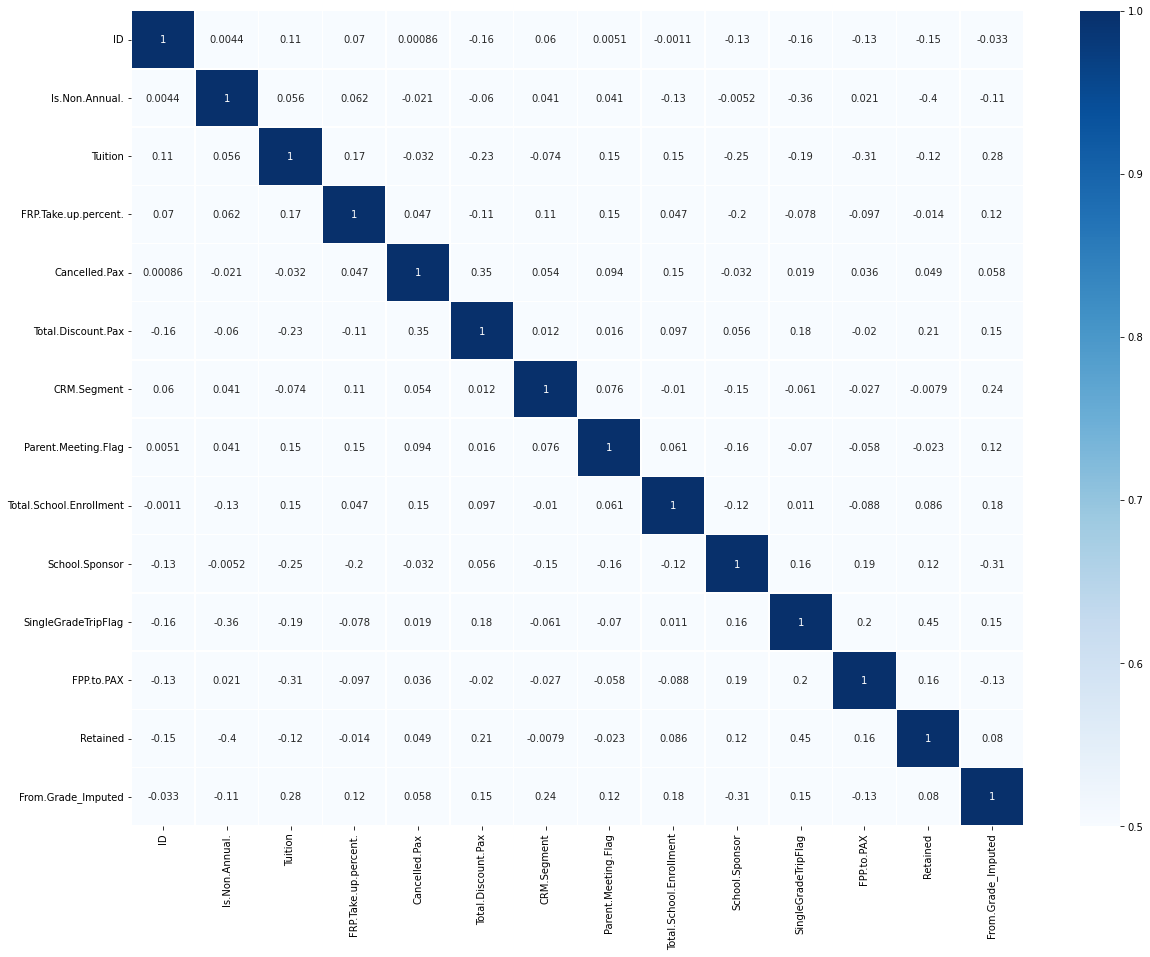

In [ ]:
#Plotting correlation matrix afetr dropping all the unnecessary columns to find the data columns that are correlated to each other
import seaborn as sns
correlation_matrix = (df1).corr()

plt.figure(figsize = (20,15)) #For Size increase
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap="Blues",vmin= 0.5)
plt.show()

In [ ]:
#Copying df1 in a new data frame
df2 = df1.copy()


In [ ]:
# Creating a adata frame only with ID Column
df4=df2.ID

In [ ]:
# Creating df3 data frame for performing encoding on the data set
df3=df2.copy()

In [ ]:
#To check the number of categorical columns in the data
df3.dtypes

ID                           int64
Is.Non.Annual.               int64
Travel.Type                 object
Special.Pay                 object
Tuition                      int64
FRP.Take.up.percent.       float64
Cancelled.Pax                int64
Total.Discount.Pax           int64
Poverty.Code                object
Region                      object
CRM.Segment                float64
School.Type                 object
Parent.Meeting.Flag          int64
Total.School.Enrollment    float64
School.Sponsor               int64
SPR.Product.Type            object
SPR.New.Existing            object
SchoolGradeType             object
DepartureMonth              object
GroupGradeType              object
MajorProgramCode            object
SingleGradeTripFlag          int64
FPP.to.PAX                 float64
SchoolSizeIndicator         object
Retained                     int64
From.Grade_Imputed         float64
dtype: object

In [ ]:
#Installing category encoders
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 781 kB/s 


In [ ]:
#Performing one hot encoding to convert categorical values to binary
from sklearn.preprocessing import OneHotEncoder
from category_encoders.one_hot import OneHotEncoder
ohe = OneHotEncoder(use_cat_names=True)
df3=ohe.fit_transform(df3)

In [ ]:
# Check for the column names of the encoded data frame
column_headers = list(df3.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['ID', 'Is.Non.Annual.', 'Travel.Type_A', 'Travel.Type_T', 'Travel.Type_B', 'Travel.Type_N', 'Special.Pay_NU', 'Special.Pay_CP', 'Special.Pay_FR', 'Special.Pay_SA', 'Tuition', 'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code_B', 'Poverty.Code_C', 'Poverty.Code_D', 'Poverty.Code_U', 'Poverty.Code_A', 'Poverty.Code_E', 'Poverty.Code_0', 'Region_Southern California', 'Region_Other', 'Region_Houston', 'Region_Northern California', 'Region_Dallas', 'Region_Pacific Northwest', 'CRM.Segment', 'School.Type_PUBLIC', 'School.Type_Catholic', 'School.Type_CHD', 'School.Type_Private non-Christian', 'Parent.Meeting.Flag', 'Total.School.Enrollment', 'School.Sponsor', 'SPR.Product.Type_CA History', 'SPR.Product.Type_East Coast', 'SPR.Product.Type_Science', 'SPR.Product.Type_Costa Rica', 'SPR.Product.Type_International', 'SPR.Product.Type_IL History', 'SPR.New.Existing_EXISTING', 'SPR.New.Existing_NEW', 'SchoolGradeType_Elementary->Elementary', 'SchoolGra

In [ ]:
#Droping one redundant column from each encoded ccolumn to avoid duplication
df3.drop(['Travel.Type_A','Special.Pay_CP','Poverty.Code_0','Region_Houston','School.Type_PUBLIC','SPR.Product.Type_CA History','SPR.New.Existing_EXISTING','SchoolGradeType_Elementary->Middle','DepartureMonth_February','GroupGradeType_Elementary->High','MajorProgramCode_C','SchoolSizeIndicator_S'],axis=1,inplace=True)

In [ ]:
# Importing all machine learning models useful for prediction
from numpy.ma.core import shape
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report



In [ ]:
# Creating the test data set for training the model
X = df3.drop(['Retained'],axis='columns') 
y = df3.Retained

In [ ]:
# split the dataset -- > training sub-dataset: 70%; test sub-dataset: 20%
test_size = 0.30

# Selection of records to include in which sub-dataset must be done randomly
# use the seed for randomization
seed = 1

# Split the dataset (both input and output) int training/testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=seed)

Random Forest Classifier

In [ ]:
#Using Random Forest Classifier to check the accuracy of model
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state= seed, verbose=0,
            warm_start=False)

In [ ]:
#Accuracy
model.fit(X_train, y_train)
Y_predict= model.predict(X_test)
result = accuracy_score(Y_predict, y_test)

#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 80.870%


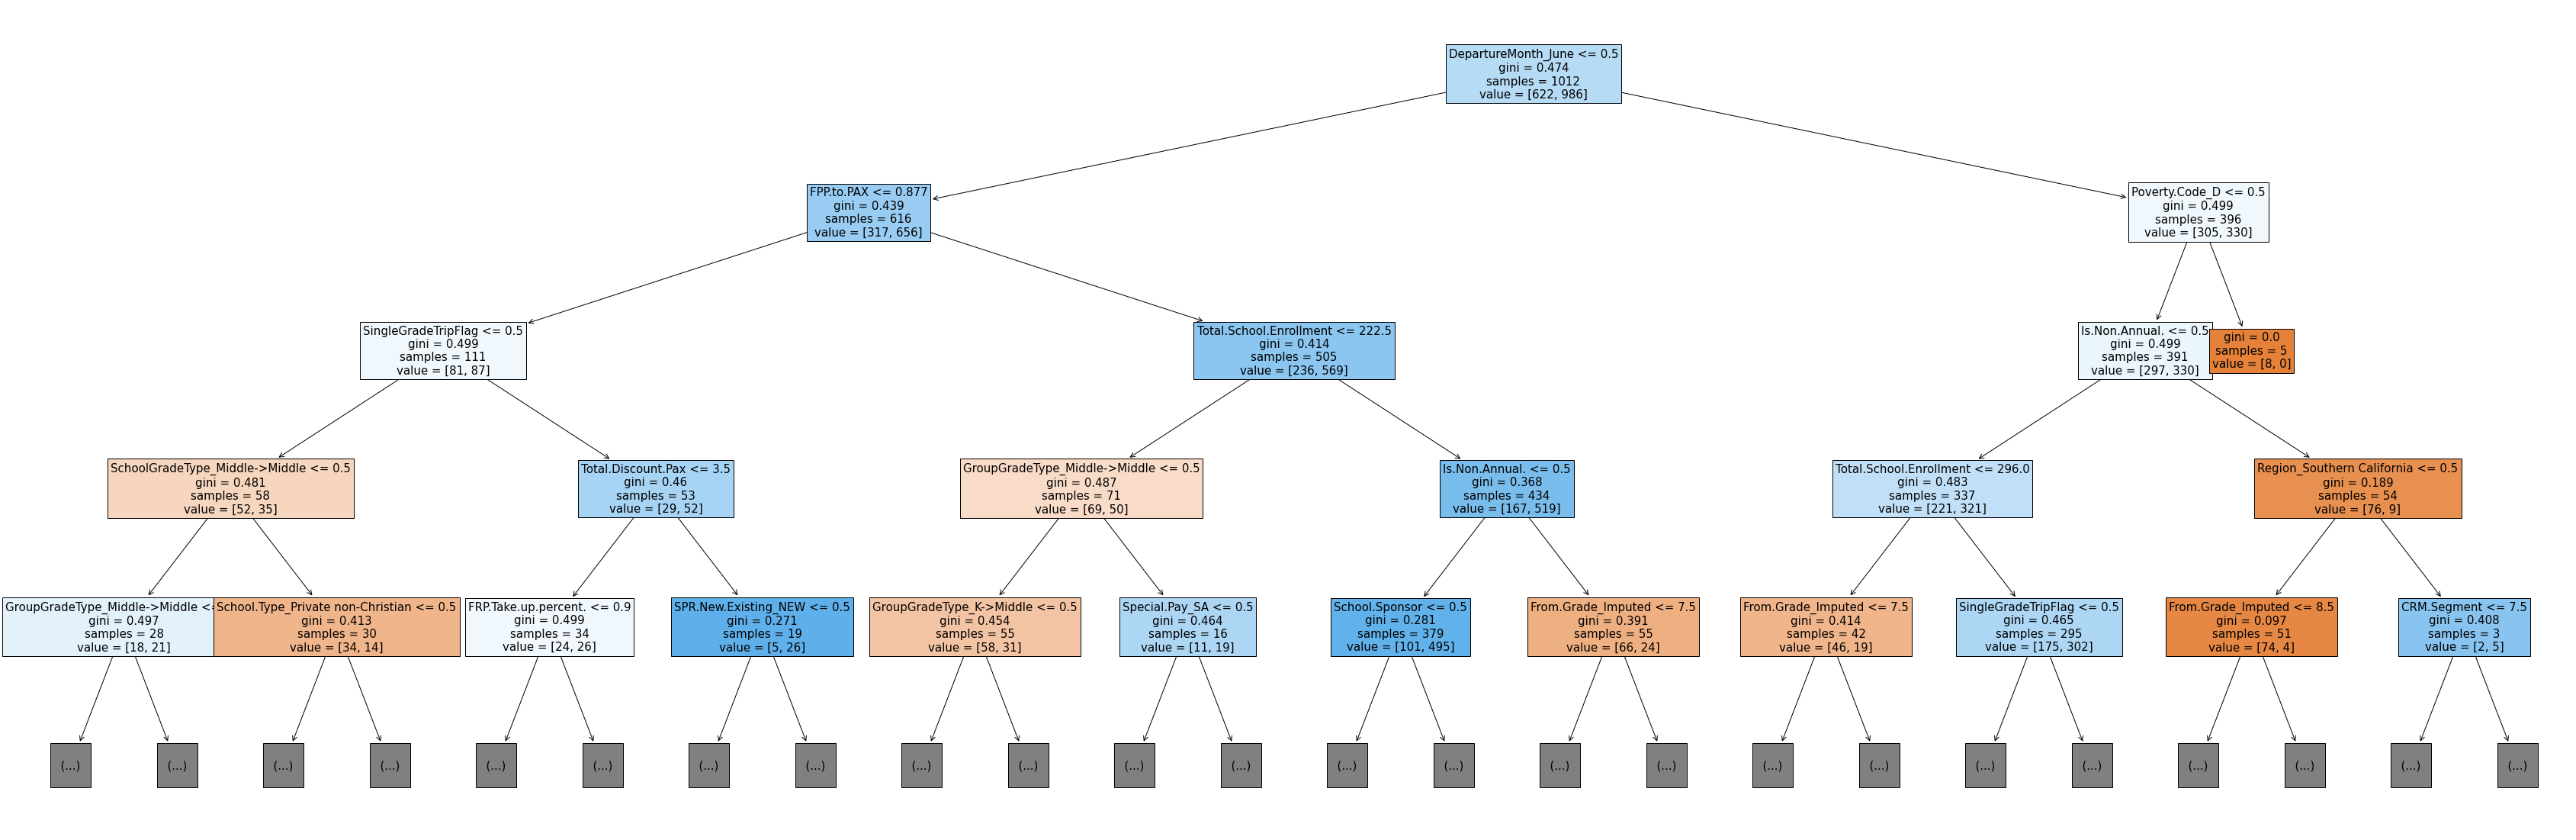

In [ ]:
#Plotting the tree for Random Forest
plt.figure(figsize=(60,20))
tree.plot_tree(model[4],fontsize = 15, feature_names = X_train.columns,filled = True, max_depth=4) #Model of 4th estimator
plt.show()

Decision Tree 

In [ ]:
# Fitting the Decision tree model to data
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

# Predict the test set labels
y_pred_dt = dtr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error 

In [ ]:
# Evaluate the test-set accuracy
classification_report = classification_report(y_test,y_pred_dt)
print(classification_report)
confusion_matrix3 = confusion_matrix(y_test,y_pred_dt)
print(confusion_matrix3)
mean_squared_error3 = mean_squared_error(y_test,y_pred_dt)
print('Mean square vaue for this model is',mean_squared_error3)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       268
           1       0.78      0.76      0.77       422

    accuracy                           0.72       690
   macro avg       0.71      0.71      0.71       690
weighted avg       0.72      0.72      0.72       690

[[178  90]
 [102 320]]
Mean square vaue for this model is 0.2782608695652174
Accuracy: 0.7217391304347827


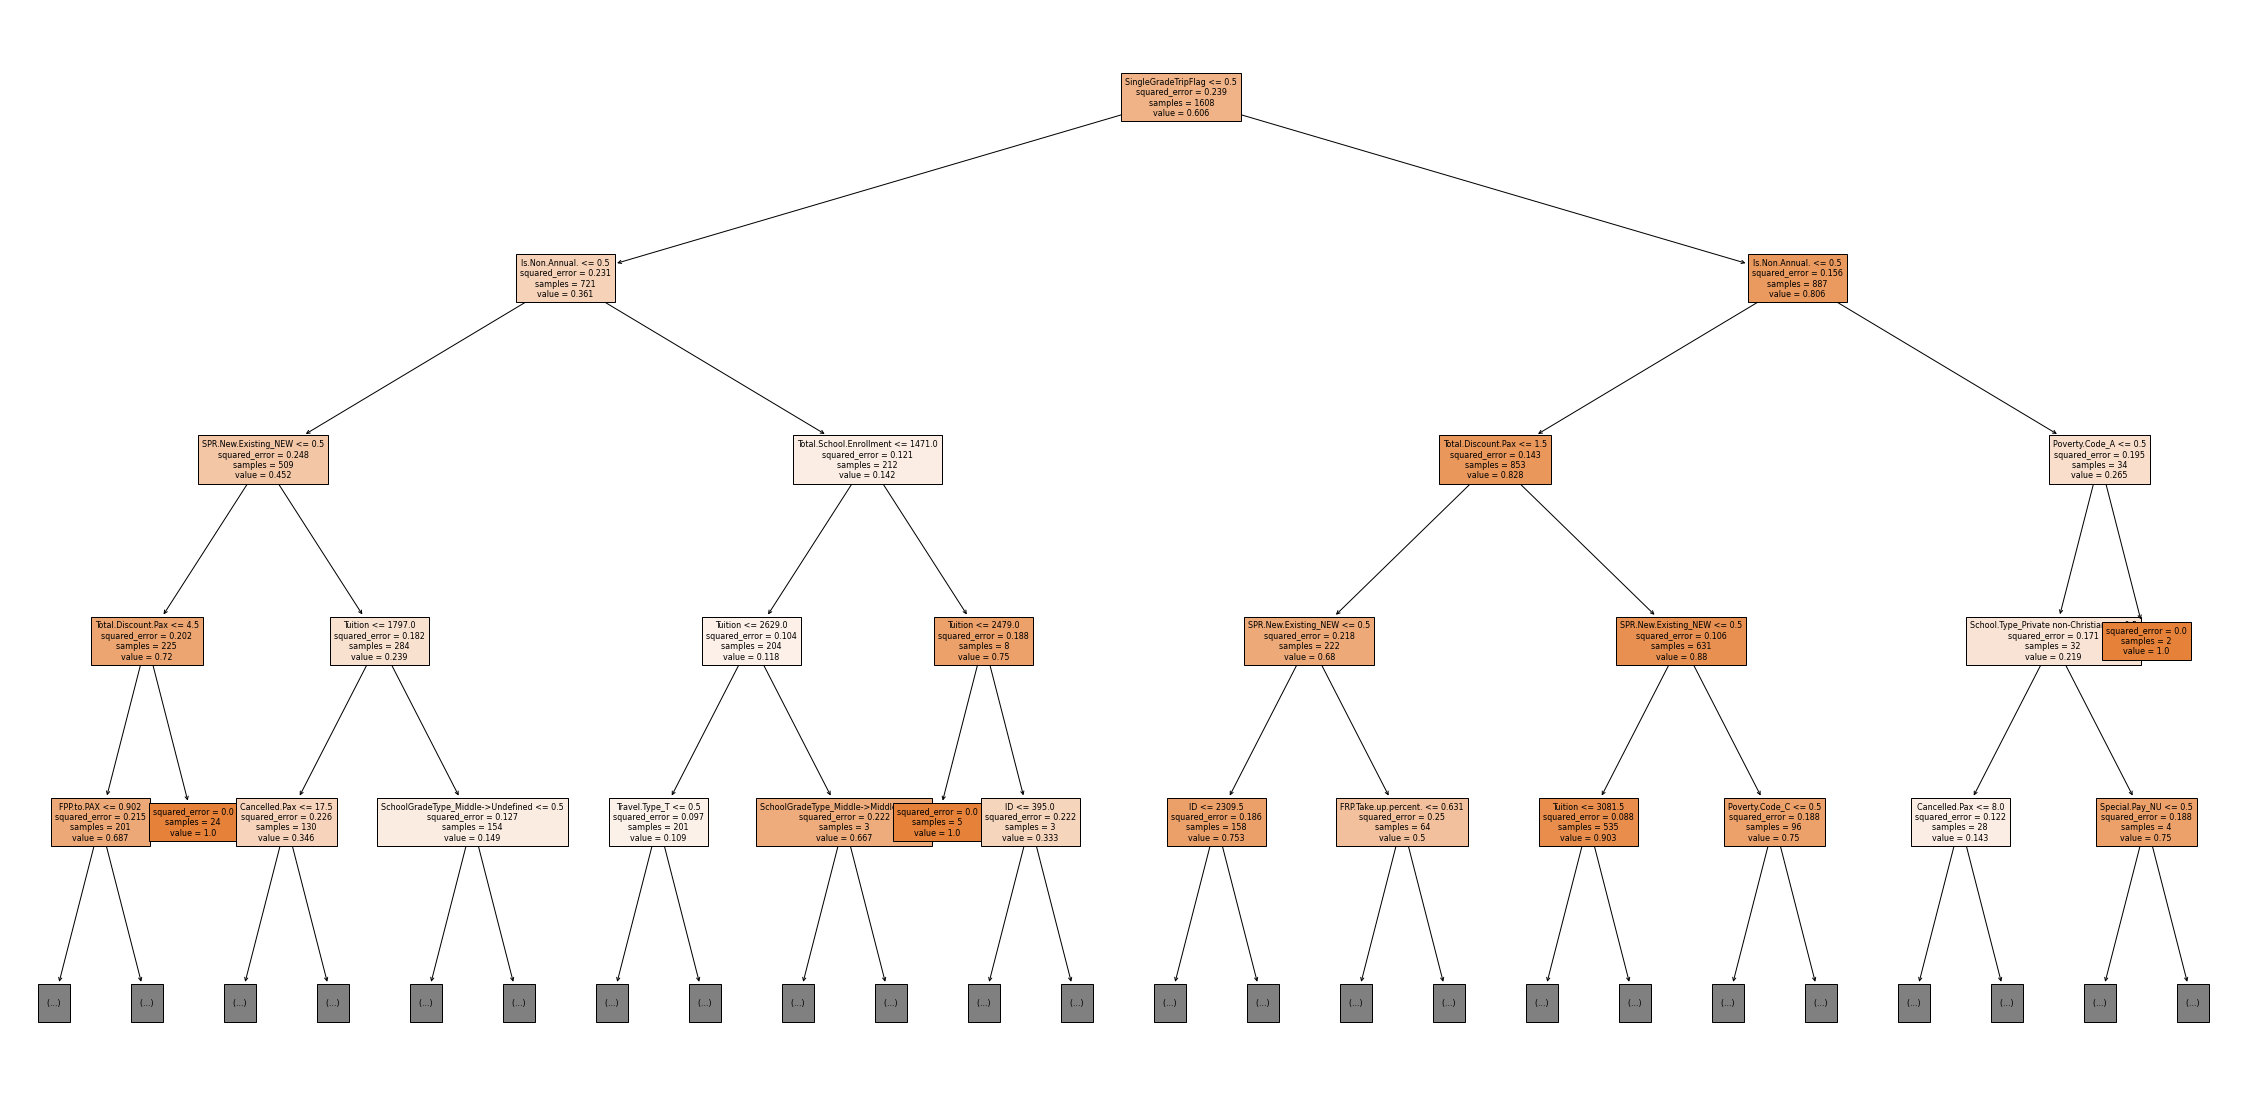

In [ ]:
#Decision Tree visualizatoin
plt.figure(figsize=(40,20))
tree_plot = tree.plot_tree(dtr, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 4)
plt.show()

KNN

In [ ]:
#Importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
from sklearn.metrics import classification_report

In [ ]:
# Fit dt to the training set
knn.fit(X_train,y_train)

# Predict the test set labels
y_pred_knn = knn.predict(X_test)
# Evaluate the test-set accuracy
classification_report_knn = classification_report(y_test,y_pred_knn)
print(classification_report)
confusion_matrix = confusion_matrix(y_test,y_pred_knn)
print(confusion_matrix)
mean_squared_error = mean_squared_error(y_test,y_pred_knn)
print('Mean square vaue for this model is',mean_squared_error)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_knn))

<function classification_report at 0x7feada1f4310>
[[ 96 172]
 [ 79 343]]
Mean square vaue for this model is 0.36376811594202896
Accuracy: 0.636231884057971


XG Boost

In [ ]:
#Checking accuracy with XG Boost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_XG = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred_XG)*100, "%")

Accuracy Score : 81.59420289855073 %


Predictions

In [ ]:
# Prediction
C_pred = model.predict(X)
C_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#Merging predicted data with previoius dataset
predicted_df = pd.DataFrame(data=C_pred, columns=['Future_Trip'], 
                            index=X.index.copy())
df_out = pd.merge(df1, predicted_df, how ='left', left_index=True, 
                 right_index=True)
df_out.info()
df8 = df_out.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2388
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2298 non-null   int64  
 1   Is.Non.Annual.           2298 non-null   int64  
 2   Travel.Type              2298 non-null   object 
 3   Special.Pay              2298 non-null   object 
 4   Tuition                  2298 non-null   int64  
 5   FRP.Take.up.percent.     2298 non-null   float64
 6   Cancelled.Pax            2298 non-null   int64  
 7   Total.Discount.Pax       2298 non-null   int64  
 8   Poverty.Code             2298 non-null   object 
 9   Region                   2298 non-null   object 
 10  CRM.Segment              2298 non-null   float64
 11  School.Type              2298 non-null   object 
 12  Parent.Meeting.Flag      2298 non-null   int64  
 13  Total.School.Enrollment  2298 non-null   float64
 14  School.Sponsor          

### **PART B**

In [ ]:
data2 = pd.read_excel("Part2.xlsx")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2389 non-null   int64         
 1   NPS 2011        1812 non-null   float64       
 2   NPS 2010        1160 non-null   float64       
 3   NPS 2009        1164 non-null   float64       
 4   NPS 2008        977 non-null    float64       
 5   >= 3 FPP Date   2380 non-null   datetime64[ns]
 6   >= 10 FPP Date  1980 non-null   datetime64[ns]
 7   >= 20 FPP Date  1365 non-null   datetime64[ns]
 8   >= 35 FPP Date  771 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(4), int64(1)
memory usage: 168.1 KB


In [ ]:
df10 = pd.merge(df2,data2)

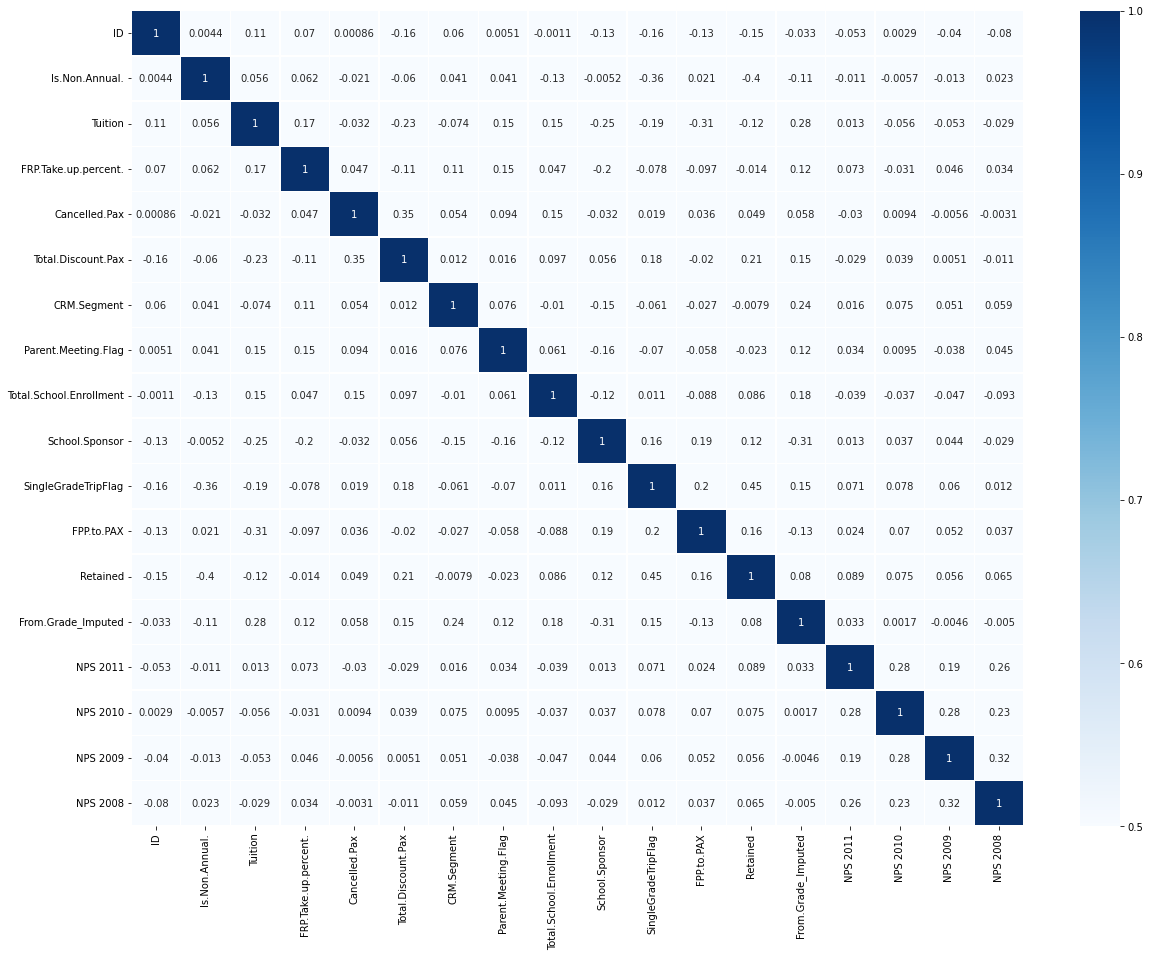

In [ ]:
#Plotting correlation matrix to find the data columns that are correlated to each other
import seaborn as sns
correlation_matrix = (df10).corr()

plt.figure(figsize = (20,15)) #For Size increase
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap="Blues",vmin= 0.5)
plt.show()

In [ ]:
data2.isnull().sum()

ID                   0
NPS 2011           577
NPS 2010          1229
NPS 2009          1225
NPS 2008          1412
>= 3 FPP Date        9
>= 10 FPP Date     409
>= 20 FPP Date    1024
>= 35 FPP Date    1618
dtype: int64

In [ ]:
df6 = pd.merge(df3,data2, on=['ID'],how='left')
df6

,ID,Is.Non.Annual.,Travel.Type_T,Travel.Type_B,Travel.Type_N,Special.Pay_NU,Special.Pay_FR,Special.Pay_SA,Tuition,FRP.Take.up.percent.,...,Retained,From.Grade_Imputed,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
0,1,0,0,0,0,1,0,0,424,0.424,...,1,4.0,10.0,10.0,10.0,10.0,2010-06-06,2010-06-18,2010-08-17,2010-08-30
1,2,0,0,0,0,0,0,0,2350,0.409,...,1,8.0,9.0,10.0,10.0,NaN,2009-12-15,2010-01-20,2010-05-31,NaT
2,3,0,0,0,0,1,0,0,1181,0.708,...,1,8.0,NaN,10.0,10.0,NaN,2010-06-09,2010-06-09,2010-10-26,NaT
3,5,0,1,0,0,1,0,0,865,0.494,...,0,6.0,10.0,NaN,10.0,NaN,2010-05-13,2010-05-24,2010-05-27,2010-06-01
4,6,0,0,0,0,1,0,0,2025,0.900,...,1,10.0,10.0,NaN,NaN,NaN,2010-08-19,2010-12-15,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2382,0,0,0,0,1,0,0,2650,1.000,...,0,6.0,7.0,10.0,9.0,NaN,2010-11-16,NaT,NaT,NaT
2294,2383,0,0,0,0,1,0,0,2519,0.600,...,1,9.0,NaN,NaN,NaN,NaN,2010-11-15,2010-12-01,NaT,NaT
2295,2385,0,0,0,0,1,0,0,1892,0.514,...,0,7.0,9.0,10.0,9.0,9.0,2010-12-05,2010-12-13,2010-12-15,2011-04-28
2296,2386,0,0,0,0,0,1,0,1699,0.800,...,1,8.0,10.0,10.0,10.0,NaN,2010-06-20,2010-10-12,2010-11-09,NaT


In [ ]:
df6.isnull().sum()

ID                   0
Is.Non.Annual.       0
Travel.Type_T        0
Travel.Type_B        0
Travel.Type_N        0
                  ... 
NPS 2008          1353
>= 3 FPP Date        9
>= 10 FPP Date     398
>= 20 FPP Date     987
>= 35 FPP Date    1557
Length: 79, dtype: int64

In [ ]:
df6.describe()

,ID,Is.Non.Annual.,Travel.Type_T,Travel.Type_B,Travel.Type_N,Special.Pay_NU,Special.Pay_FR,Special.Pay_SA,Tuition,FRP.Take.up.percent.,...,FPP.to.PAX,SchoolSizeIndicator_L,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S-M,Retained,From.Grade_Imputed,NPS 2011,NPS 2010,NPS 2009,NPS 2008
count,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,...,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,2298.000000,1751.000000,1118.000000,1129.000000,945.000000
mean,1196.646214,0.154917,0.002611,0.152742,0.000870,0.809835,0.120975,0.039600,1616.018712,0.575072,...,0.900108,0.259791,0.258486,0.261097,0.607920,7.301131,9.402627,9.474061,9.410983,9.361905
std,688.528172,0.361905,0.051042,0.359816,0.029495,0.392517,0.326169,0.195059,643.109225,0.226719,...,0.048884,0.438615,0.437898,0.439328,0.488321,1.353757,1.065068,0.878851,1.042239,1.061772
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.000000,...,0.600000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000,1.000000
25%,598.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1174.000000,0.462000,...,0.882353,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,9.000000,9.000000,9.000000
50%,1199.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1703.500000,0.600000,...,0.909091,0.000000,0.000000,0.000000,1.000000,8.000000,10.000000,10.000000,10.000000,10.000000
75%,1792.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2046.750000,0.727750,...,0.932375,1.000000,1.000000,1.000000,1.000000,8.000000,10.000000,10.000000,10.000000,10.000000
max,2389.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4200.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category1(df6,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category1=df6[ColName].mode()[0]
    
    # replace nan values with most occured category
     df6[ColName + "_Imputed"] = df6[ColName]
     df6[ColName + "_Imputed"].fillna(most_frequent_category1,inplace=True)
#2. Call function to impute most occured category
for Columns in ['NPS 2011','NPS 2010','NPS 2009','NPS 2008']:
    impute_nan_most_frequent_category1(df6,Columns)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2297
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ID                                      2298 non-null   int64         
 1   Is.Non.Annual.                          2298 non-null   int64         
 2   Travel.Type_T                           2298 non-null   int64         
 3   Travel.Type_B                           2298 non-null   int64         
 4   Travel.Type_N                           2298 non-null   int64         
 5   Special.Pay_NU                          2298 non-null   int64         
 6   Special.Pay_FR                          2298 non-null   int64         
 7   Special.Pay_SA                          2298 non-null   int64         
 8   Tuition                                 2298 non-null   int64         
 9   FRP.Take.up.percent.                    2298 non-nul

In [ ]:
df6.rename(columns={'>= 3 FPP Date': '3_FPP_DATE', '>= 10 FPP Date': '10_FPP_Date','>= 20 FPP Date': '20_FPP_Date','>= 35 FPP Date': '35_FPP_Date'},inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2297
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ID                                      2298 non-null   int64         
 1   Is.Non.Annual.                          2298 non-null   int64         
 2   Travel.Type_T                           2298 non-null   int64         
 3   Travel.Type_B                           2298 non-null   int64         
 4   Travel.Type_N                           2298 non-null   int64         
 5   Special.Pay_NU                          2298 non-null   int64         
 6   Special.Pay_FR                          2298 non-null   int64         
 7   Special.Pay_SA                          2298 non-null   int64         
 8   Tuition                                 2298 non-null   int64         
 9   FRP.Take.up.percent.                    2298 non-nul

In [ ]:
#converting '35_FPP_Date' column into separte day monmth and year columns
df6['35_FPP_Date'] = pd.to_datetime(df6['35_FPP_Date'],format='%m/%d/%Y')
#creating FPP_day , FPP_Month and FPP_year columns
import datetime
df6['FPP_day']=df6['35_FPP_Date'].dt.day
df6['FPP_month']=df6['35_FPP_Date'].dt.month
df6['FPP_year']=df6['35_FPP_Date'].dt.year

In [ ]:
df6

,ID,Is.Non.Annual.,Travel.Type_T,Travel.Type_B,Travel.Type_N,Special.Pay_NU,Special.Pay_FR,Special.Pay_SA,Tuition,FRP.Take.up.percent.,...,10_FPP_Date,20_FPP_Date,35_FPP_Date,NPS 2011_Imputed,NPS 2010_Imputed,NPS 2009_Imputed,NPS 2008_Imputed,FPP_day,FPP_month,FPP_year
0,1,0,0,0,0,1,0,0,424,0.424,...,2010-06-18,2010-08-17,2010-08-30,10.0,10.0,10.0,10.0,30.0,8.0,2010.0
1,2,0,0,0,0,0,0,0,2350,0.409,...,2010-01-20,2010-05-31,NaT,9.0,10.0,10.0,10.0,NaN,NaN,NaN
2,3,0,0,0,0,1,0,0,1181,0.708,...,2010-06-09,2010-10-26,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN
3,5,0,1,0,0,1,0,0,865,0.494,...,2010-05-24,2010-05-27,2010-06-01,10.0,10.0,10.0,10.0,1.0,6.0,2010.0
4,6,0,0,0,0,1,0,0,2025,0.900,...,2010-12-15,NaT,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2382,0,0,0,0,1,0,0,2650,1.000,...,NaT,NaT,NaT,7.0,10.0,9.0,10.0,NaN,NaN,NaN
2294,2383,0,0,0,0,1,0,0,2519,0.600,...,2010-12-01,NaT,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN
2295,2385,0,0,0,0,1,0,0,1892,0.514,...,2010-12-13,2010-12-15,2011-04-28,9.0,10.0,9.0,9.0,28.0,4.0,2011.0
2296,2386,0,0,0,0,0,1,0,1699,0.800,...,2010-10-12,2010-11-09,NaT,10.0,10.0,10.0,10.0,NaN,NaN,NaN


In [ ]:
df6.drop(['35_FPP_Date','20_FPP_Date','3_FPP_DATE','10_FPP_Date'],axis=1,inplace=True)
df6

,ID,Is.Non.Annual.,Travel.Type_T,Travel.Type_B,Travel.Type_N,Special.Pay_NU,Special.Pay_FR,Special.Pay_SA,Tuition,FRP.Take.up.percent.,...,NPS 2010,NPS 2009,NPS 2008,NPS 2011_Imputed,NPS 2010_Imputed,NPS 2009_Imputed,NPS 2008_Imputed,FPP_day,FPP_month,FPP_year
0,1,0,0,0,0,1,0,0,424,0.424,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,30.0,8.0,2010.0
1,2,0,0,0,0,0,0,0,2350,0.409,...,10.0,10.0,NaN,9.0,10.0,10.0,10.0,NaN,NaN,NaN
2,3,0,0,0,0,1,0,0,1181,0.708,...,10.0,10.0,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN
3,5,0,1,0,0,1,0,0,865,0.494,...,NaN,10.0,NaN,10.0,10.0,10.0,10.0,1.0,6.0,2010.0
4,6,0,0,0,0,1,0,0,2025,0.900,...,NaN,NaN,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2382,0,0,0,0,1,0,0,2650,1.000,...,10.0,9.0,NaN,7.0,10.0,9.0,10.0,NaN,NaN,NaN
2294,2383,0,0,0,0,1,0,0,2519,0.600,...,NaN,NaN,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN
2295,2385,0,0,0,0,1,0,0,1892,0.514,...,10.0,9.0,9.0,9.0,10.0,9.0,9.0,28.0,4.0,2011.0
2296,2386,0,0,0,0,0,1,0,1699,0.800,...,10.0,10.0,NaN,10.0,10.0,10.0,10.0,NaN,NaN,NaN


In [ ]:
df6.isnull().sum()

ID                     0
Is.Non.Annual.         0
Travel.Type_T          0
Travel.Type_B          0
Travel.Type_N          0
                    ... 
NPS 2009_Imputed       0
NPS 2008_Imputed       0
FPP_day             1557
FPP_month           1557
FPP_year            1557
Length: 82, dtype: int64

In [ ]:
from numpy.ma.core import shape
# Import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

## Lets create X and Y
A = df6.drop(columns=['Retained']) 
b = df6.Retained
print(A.shape)
print(b.shape)

(2298, 81)
(2298,)


In [ ]:
A = np.nan_to_num(A.astype(np.float32))
print(A)
A.shape

[[1.000e+00 0.000e+00 0.000e+00 ... 3.000e+01 8.000e+00 2.010e+03]
 [2.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.385e+03 0.000e+00 0.000e+00 ... 2.800e+01 4.000e+00 2.011e+03]
 [2.386e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.389e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


(2298, 81)

In [ ]:
# Split the dataset into 70% train, 30% test
A_train, A_test, b_train, b_test= train_test_split(A, b,test_size=0.3,random_state=1)
# INITIATE Random CLASSIFIER
rf1 = RandomForestClassifier()

In [ ]:
# Fit dt to the training set
rf1.fit(A_train,b_train)

# Predict the test set labels
b_pred = rf1.predict(A_test)
# Evaluate the test-set accuracy
classification_report = classification_report(b_test,b_pred)
print(classification_report)
confusion_matrix = confusion_matrix(b_test,b_pred)
print(confusion_matrix)
mean_squared_error = mean_squared_error(b_test,b_pred)
print(mean_squared_error) 
print("Accuracy:",metrics.accuracy_score(b_test,b_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       268
           1       0.85      0.86      0.85       422

    accuracy                           0.82       690
   macro avg       0.81      0.80      0.81       690
weighted avg       0.82      0.82      0.82       690

[[202  66]
 [ 61 361]]
0.18405797101449275
Accuracy: 0.8159420289855073


Lets try XGBoost


In [ ]:
from numpy.ma.core import shape
# Import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

## Lets create X and Y
X = df6.drop(columns=['Retained']) 
y = df6.Retained
print(X.shape)
print(y.shape)

(2298, 81)
(2298,)


In [ ]:
X = np.nan_to_num(X.astype(np.float32))
print(X)
X.shape

[[1.000e+00 0.000e+00 0.000e+00 ... 3.000e+01 8.000e+00 2.010e+03]
 [2.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.385e+03 0.000e+00 0.000e+00 ... 2.800e+01 4.000e+00 2.011e+03]
 [2.386e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.389e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


(2298, 81)

In [ ]:
# Split the dataset into 70% train, 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3,random_state=1)
# INITIATE XGBOOST CLASSIFIER
XGB = XGBClassifier()

In [ ]:
# Fit dt to the training set
XGB.fit(X_train,y_train)

# Predict the test set labels
y_pred = XGB.predict(X_test)
# Evaluate the test-set accuracy
classification_report = classification_report(y_test,y_pred)
print(classification_report)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
mean_squared_error = mean_squared_error(y_test,y_pred)
print(mean_squared_error) 
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       268
           1       0.84      0.86      0.85       422

    accuracy                           0.82       690
   macro avg       0.81      0.81      0.81       690
weighted avg       0.82      0.82      0.82       690

[[201  67]
 [ 58 364]]
0.18115942028985507
Accuracy: 0.8188405797101449


In [ ]:
Future_pred = XGB.predict(X)
Future_pred.shape

(2298,)

In [ ]:
## Adding predicted value to the intital dataframe
predict_df = pd.DataFrame(data=Future_pred, columns=['Future_retained'], 
                            index=df6.index.copy())
df7 = pd.merge(df1, predict_df, how ='left',left_index=True, 
                 right_index=True)
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2388
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2298 non-null   int64  
 1   Is.Non.Annual.           2298 non-null   int64  
 2   Travel.Type              2298 non-null   object 
 3   Special.Pay              2298 non-null   object 
 4   Tuition                  2298 non-null   int64  
 5   FRP.Take.up.percent.     2298 non-null   float64
 6   Cancelled.Pax            2298 non-null   int64  
 7   Total.Discount.Pax       2298 non-null   int64  
 8   Poverty.Code             2298 non-null   object 
 9   Region                   2298 non-null   object 
 10  CRM.Segment              2298 non-null   float64
 11  School.Type              2298 non-null   object 
 12  Parent.Meeting.Flag      2298 non-null   int64  
 13  Total.School.Enrollment  2298 non-null   float64
 14  School.Sponsor          

In [ ]:
##Dropping rows which has NA value in Future retained column
df8 = df7[df7.Future_retained >= 0]
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2297
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2212 non-null   int64  
 1   Is.Non.Annual.           2212 non-null   int64  
 2   Travel.Type              2212 non-null   object 
 3   Special.Pay              2212 non-null   object 
 4   Tuition                  2212 non-null   int64  
 5   FRP.Take.up.percent.     2212 non-null   float64
 6   Cancelled.Pax            2212 non-null   int64  
 7   Total.Discount.Pax       2212 non-null   int64  
 8   Poverty.Code             2212 non-null   object 
 9   Region                   2212 non-null   object 
 10  CRM.Segment              2212 non-null   float64
 11  School.Type              2212 non-null   object 
 12  Parent.Meeting.Flag      2212 non-null   int64  
 13  Total.School.Enrollment  2212 non-null   float64
 14  School.Sponsor          

In [ ]:
##How many people are likely to come in the future
future_people = df8.groupby("Future_retained")["School.Type"].count()
future_people

Future_retained
0.0     794
1.0    1418
Name: School.Type, dtype: int64

In [ ]:
##How many people are likely to come in the future
Past_retained = df8.groupby("Retained")["School.Type"].count()
Past_retained

Retained
0     850
1    1362
Name: School.Type, dtype: int64

In [ ]:
df9 = df8[df8['Future_retained'] == 1]
Future_retained_people = df9.groupby("School.Type")["Future_retained"].count()
df10 = Future_retained_people.to_frame(name='Future Retained people')
print(df10)

                       Future Retained people
School.Type                                  
CHD                                       153
Catholic                                  108
PUBLIC                                   1051
Private non-Christian                     106


In [ ]:
## People already got retained
df11 = df1[df1['Retained'] == 1]
Past_retained = df11.groupby("School.Type")["Retained"].count()
df12 = Past_retained.to_frame(name='Past Retained')
print(df12)

                       Past Retained
School.Type                         
CHD                              132
Catholic                         106
PUBLIC                          1048
Private non-Christian            111


In [ ]:
##Total tirps
past_retained_type = df1.groupby("School.Type")["Retained"].count()
df13 = past_retained_type.to_frame(name='Total Trip')
print(df13)

                       Total Trip
School.Type                      
CHD                           207
Catholic                      163
PUBLIC                       1777
Private non-Christian         151


In [ ]:
## Merge all three columns together
df14 = pd.merge(df13,df12, on=['School.Type'])
df15 = pd.merge(df14,df10, on=['School.Type'])
df15

,Total Trip,Past Retained,Future Retained people
School.Type,,,
CHD,207,132,153
Catholic,163,106,108
PUBLIC,1777,1048,1051
Private non-Christian,151,111,106


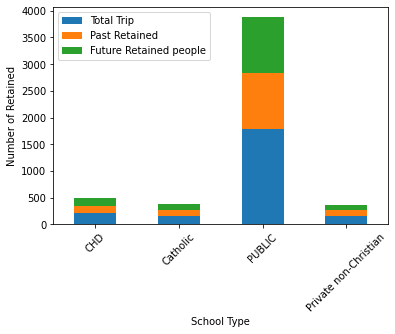

In [ ]:
df15.plot(kind="bar",rot ='45',stacked=True)
plt.xlabel("School Type")
plt.ylabel("Number of Retained")
plt.legend()
plt.show()

In [ ]:
Future_retained_region = df9.groupby("Region")["Future_retained"].count()
df16 = Future_retained_region.to_frame(name='Future Retained people')
print(df16)

                     Future Retained people
Region                                     
Dallas                                   94
Houston                                  82
Northern California                     169
Other                                   714
Pacific Northwest                        90
Southern California                     269


In [ ]:
Past_retained_region = df11.groupby("Region")["Retained"].count()
df17 = Past_retained_region.to_frame(name='Past Retained')
print(df17)

                     Past Retained
Region                            
Dallas                          89
Houston                         82
Northern California            162
Other                          688
Pacific Northwest               86
Southern California            290


In [ ]:
##Total trips
total_retained_region = df1.groupby("Region")["Retained"].count()
df18 = total_retained_region.to_frame(name='Total Trip')
print(df18)

                     Total Trip
Region                         
Dallas                      157
Houston                     142
Northern California         265
Other                      1118
Pacific Northwest           192
Southern California         424


In [ ]:
## Merge of dataframes
df19 = pd.merge(df18,df16, on=['Region'],how='left')
df20 = pd.merge(df19,df17, on=['Region'],how='left')
df20

,Total Trip,Future Retained people,Past Retained
Region,,,
Dallas,157,94,89
Houston,142,82,82
Northern California,265,169,162
Other,1118,714,688
Pacific Northwest,192,90,86
Southern California,424,269,290


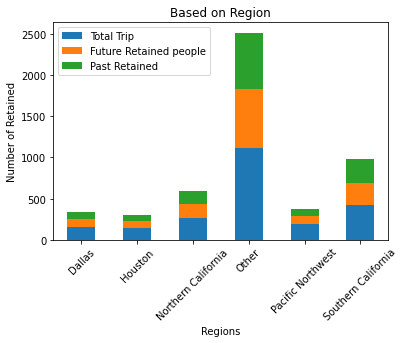

In [ ]:
df20.plot(kind="bar",rot ='45',stacked=True)
plt.title("Based on Region")
plt.xlabel("Regions")
plt.ylabel("Number of Retained")
plt.legend()
plt.show()